In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Check for missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
# Check for duplicates
data.duplicated().sum()

0

In [5]:
# Descriptive statistics for numerical features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
# Descriptive statistics for categorical variables
data.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


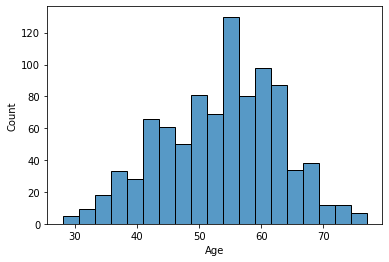

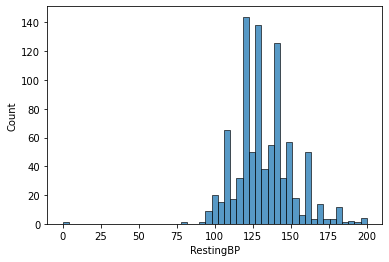

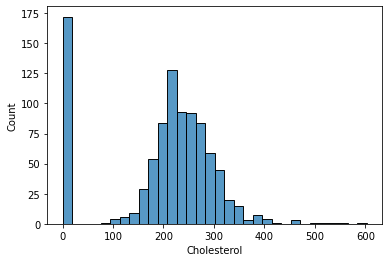

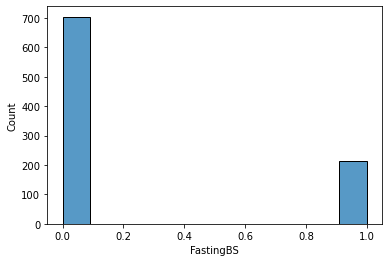

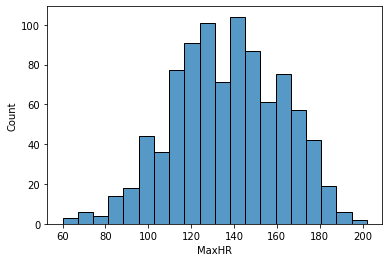

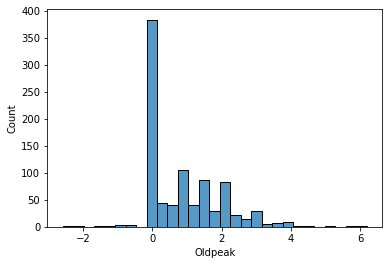

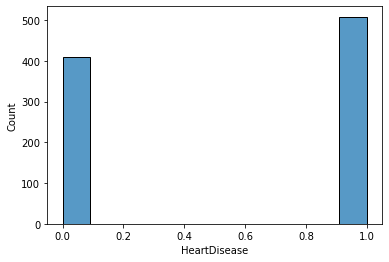

In [7]:
# Histograms for numerical features
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data, x=i)
    plt.show()

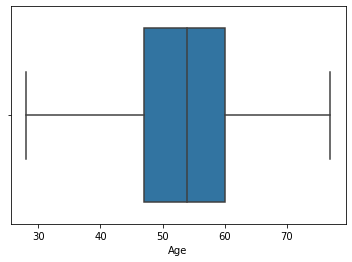

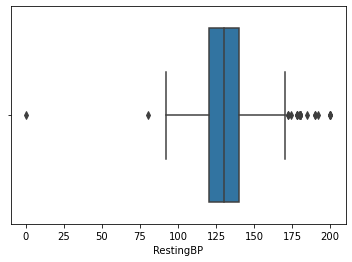

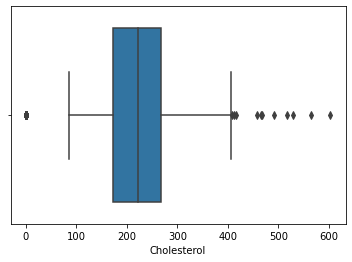

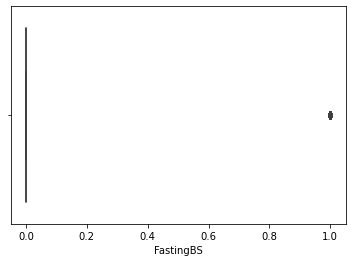

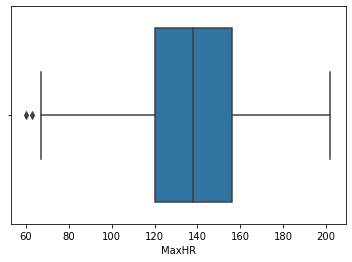

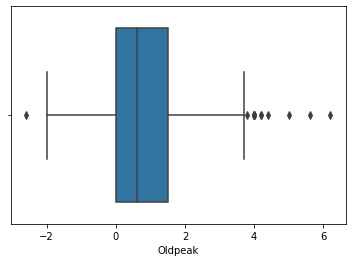

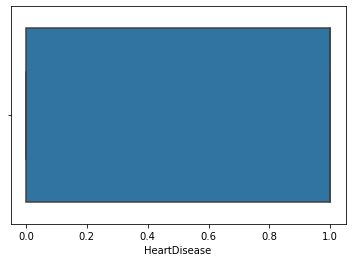

In [8]:
# Boxplot to indentify outliers
for i in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x=i)
    plt.show()

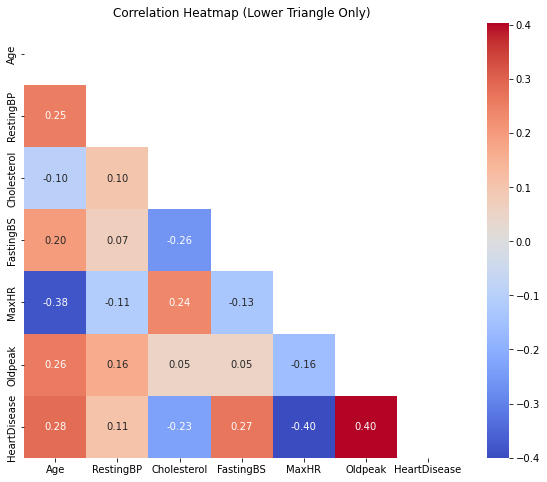

In [9]:
corr = data.select_dtypes(include="number").corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap (Lower Triangle Only)")
plt.show()

## Zero value treatment

In [10]:
# Handle missing(zero) cholesterol values
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
median_chol = data['Cholesterol'].median()
data['Cholesterol'].fillna(median_chol, inplace=True)


## Encoding the data

In [11]:
# Handle zero resting blood pressure value
for i in data[data["RestingBP"] == 0].index:
    data.drop(index=i, inplace=True)

In [12]:
# Handle oldpeak values below zero
for i in data[data["Oldpeak"] < 0].index:
    data.drop(index=i, inplace=True)

In [13]:
# Make dummy (one-hot encode) variables for categorical features
data = pd.get_dummies(data=data, columns=["Sex", "ExerciseAngina", "ChestPainType", "RestingECG", "ST_Slope"], drop_first= False)

data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,54,150,195.0,0,122,0.0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
914,68,144,193.0,1,141,3.4,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
915,57,130,131.0,0,115,1.2,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
916,57,130,236.0,0,174,0.0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


In [14]:
# Move 'HeartDisease' to the front
cols = ['HeartDisease'] + [col for col in data.columns if col != 'HeartDisease']
data = data[cols]

# data = data.drop(columns=["RestingBP", "Cholesterol", "ChestPainType_NAP", "ChestPainType_TA", 
#                            "RestingECG_LVH", "RestingECG_Normal", "RestingECG_ST", "ST_Slope_Down"])
#data = data.drop(columns=["RestingECG_LVH", "RestingECG_Normal", "RestingECG_ST", "ST_Slope_Down"])
#"RestingBP", "Cholesterol", 

# data = data.drop(columns=["RestingBP", 
#                           "ChestPainType_NAP", 
#                           "ChestPainType_TA", 
#                           "RestingECG_Normal", 
#                           "RestingECG_ST"])

# Drop columns that are not needed for the analysis
# data = data.drop(columns=[
#     "ChestPainType_TA",
#     "ST_Slope_Down",
#     "RestingECG_ST",
#     "ChestPainType_ATA",
#     "RestingECG_Normal",
#     "RestingECG_LVH",
#     "ChestPainType_NAP",
#     "MaxHR",
#     # "ExerciseAngina_Y",
#     # "ExerciseAngina_N",
#     "Age"
#     ])

# | Feature             | Reason                                             |
# | ------------------- | -------------------------------------------------- |
# | `Sex_M`             | Redundant with `Sex_F` (perfect inverse)           |
# | `ChestPainType_NAP` | Consistently low/irrelevant                        |
# | `ChestPainType_ATA` | Low or negative contribution                       |
# | `ChestPainType_TA`  | Still uninformative after reduction                |
# | `ST_Slope_Down`     | Minimal impact                                     |
# | `RestingECG_ST`     | No signal                                          |
# | `RestingECG_LVH`    | No signal                                          |
# | `RestingECG_Normal` | No signal                                          |
# | `ExerciseAngina_Y`  | Negative in first results                          |
# | `RestingBP`         | Negative or flat across both rounds                |
# | `Age`               | Very low or negative; likely redundant with others |


# data = data.drop(columns=[
#     "ChestPainType_NAP",
#     "ChestPainType_ATA",
#     "ChestPainType_TA",
#     "ST_Slope_Down",
#     "RestingECG_ST",
#     "RestingECG_LVH",
#     "RestingECG_Normal",
#     "ExerciseAngina_Y",
#     "Sex_M",
#     "RestingBP",
# ])

data = data.drop(columns=[
    "ChestPainType_NAP",
    "ChestPainType_ATA",
    "ChestPainType_TA",
    "ST_Slope_Down",
    "RestingECG_ST",
    "RestingECG_Normal",
    "RestingECG_LVH",
    "RestingBP",
    "ExerciseAngina_Y",
    "Sex_M"
])

feature_names = data.columns[1:]

data

,HeartDisease,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,ExerciseAngina_N,ChestPainType_ASY,ST_Slope_Flat,ST_Slope_Up
0,0,40,289.0,0,172,0.0,0,1,0,0,1
1,1,49,180.0,0,156,1.0,1,1,0,1,0
2,0,37,283.0,0,98,0.0,0,1,0,0,1
3,1,48,214.0,0,108,1.5,1,0,1,1,0
4,0,54,195.0,0,122,0.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,1,45,264.0,0,132,1.2,0,1,0,1,0
914,1,68,193.0,1,141,3.4,0,1,1,1,0
915,1,57,131.0,0,115,1.2,0,0,1,1,0
916,1,57,236.0,0,174,0.0,1,1,0,1,0


## Train - Test Split 80-20

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert DataFrame to numpy array
data = np.array(data)
m, n = data.shape

# Split the data into features (X) and target (y)
X = data.T[1:n].T
y = data.T[0]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=8)

# Transpose the data to have features in columns and samples in rows
X_train = X_train.T
X_test = X_test.T

# Ensure the target variable is in the correct format
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.T).T
X_test = scaler.transform(X_test.T).T

# Reshape the target variable to ensure it has the correct dimensions
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)

Our ANN has a simple two-layer architecture. The input layer $a^{[0]}$ consists of 10 units, corresponding to the 10 features used in the final dataset. These were derived from an original set of 20 variables, including 5 numerical, 6 categorical, and 9 one-hot encoded dummy variables, with 6 features removed based on feature importance analysis. The hidden layer $a^{[1]}$ contains 10 units with ReLU activation, and the output layer $a^{[2]}$ has 1 unit with sigmoid activation, representing the binary output class. 

**Forward propagation**

$$Z^{[1]} = W^{[1]} A^{[0]} + b^{[1]}$$
$$A^{[1]} = {g\text{ReLU}}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = {g\text{sigmoid}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$db^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]}* g^{\prime} ReLU(z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$db^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: n x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x n (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 1 x m
- $W^{[2]}$: 1 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 1 x 1

Backprop

- $dZ^{[2]}$: 1 x m ($~A^{[2]}$)
- $dW^{[2]}$: 1 x 10
- $db^{[2]}$: 1 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x n
- $db^{[1]}$: 10 x 1

In [16]:
np.random.seed(8)  # For reproducibility

# Initialize parameters for the neural network
def init_params():
    W1 = np.random.rand(10, n-1) - 0.5 # 10 hidden units, n-1 features
    b1 = np.random.rand(10, 1) - 0.5 # Bias for hidden layer
    W2 = np.random.rand(1, 10) - 0.5 # Output layer with 1 unit (binary classification)
    b2 = np.random.rand(1, 1) - 0.5 # Bias for output layer
    return W1, b1, W2, b2

# Activation functions and their derivatives
def ReLU(Z):
    return np.maximum(Z, 0) 

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def ReLU_deriv(Z):
    return Z > 0
    
# Forward and backward propagation functions
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = X.shape[1]
    dZ2 = A2 - Y 
    dW2 = 1 / m * dZ2.dot(A1.T)         # derivative of the loss with respect to W2
    db2 = 1 / m * np.sum(dZ2)           # derivative of the loss with respect to b2
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1) 
    dW1 = 1 / m * dZ1.dot(X.T)          # derivative of the loss with respect to W1
    db1 = 1 / m * np.sum(dZ1)           # derivative of the loss with respect to b1
    return dW1, db1, dW2, db2

# Update parameters of the neural network
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

# Gradient descent function to train the neural network
def gradient_descent(alpha, iterations, verbose=False):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, y_train)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 100 == 0: # Print accuracy every 100 iterations
            predictions = A2 > 0.5
            acc = np.mean(predictions == y_train)
            if verbose: print(f"Iteration {i}: Accuracy = {acc:.4f}")
            
    return W1, b1, W2, b2

## Training

In [17]:
# Train the neural network using gradient descent with 0.003 learning rate and 25000 iterations
W1, b1, W2, b2 = gradient_descent(0.003, 25000, verbose=True)

Iteration 0: Accuracy = 0.5228
Iteration 100: Accuracy = 0.6113
Iteration 200: Accuracy = 0.6750
Iteration 300: Accuracy = 0.7082
Iteration 400: Accuracy = 0.7441
Iteration 500: Accuracy = 0.7718
Iteration 600: Accuracy = 0.7939
Iteration 700: Accuracy = 0.8119
Iteration 800: Accuracy = 0.8243
Iteration 900: Accuracy = 0.8299
Iteration 1000: Accuracy = 0.8368
Iteration 1100: Accuracy = 0.8409
Iteration 1200: Accuracy = 0.8479
Iteration 1300: Accuracy = 0.8479
Iteration 1400: Accuracy = 0.8479
Iteration 1500: Accuracy = 0.8492
Iteration 1600: Accuracy = 0.8479
Iteration 1700: Accuracy = 0.8479
Iteration 1800: Accuracy = 0.8465
Iteration 1900: Accuracy = 0.8492
Iteration 2000: Accuracy = 0.8520
Iteration 2100: Accuracy = 0.8506
Iteration 2200: Accuracy = 0.8506
Iteration 2300: Accuracy = 0.8548
Iteration 2400: Accuracy = 0.8575
Iteration 2500: Accuracy = 0.8562
Iteration 2600: Accuracy = 0.8562
Iteration 2700: Accuracy = 0.8548
Iteration 2800: Accuracy = 0.8562
Iteration 2900: Accuracy =

## Making predictions on test set

In [18]:
# Helper function to get predictions from the output layer
def get_predictions(A2):
    return (A2 > 0.5).astype(int)

# Function to make predictions using the trained neural network
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions, A2

# Function to test the prediction for a specific index
def test_prediction(index, W1, b1, W2, b2, scaler):
    x = X_test[:, index:index+1]
    prediction, prediction_prob = make_predictions(x, W1, b1, W2, b2)
    label = y_test[0, index]

    print(f"Prediction (prob): {prediction_prob[0, 0]:.4f}")
    print(f"Predicted Class: {prediction}")
    print(f"Actual Label: {label}")

    original = scaler.inverse_transform(x.T)  # shape: (1, 20)
    print("\nOriginal Input Features:")
    
    feature_values = ['28 - 77', '85 - 603', '1 / 0', '60 - 202', '0 - 6.2', 'Female', 'No', 'ASY','Flat', 'Up']
    original_values = original.flatten()

    for name, fvalue, ovalue in zip(feature_names, feature_values, original_values):
        value = 0 if abs(ovalue) < 1e-4 else ovalue
        print(f"{name:<20}: {round(value, 2):<5} ({fvalue})")

In [19]:
import random
sample_num = random.randint(0, X_test.shape[1])

# Print a prediction for a random sample from the test set
# The prediction probability tells us how confident the model is about its prediction
# A low probablity indicates a confident negative prediction, while a high probability indicates a confident positive prediction
# A probability close to 0.5 indicates uncertainty in the prediction

print('Sample: ', sample_num)
test_prediction(sample_num, W1, b1, W2, b2, scaler)

Sample:  4
Prediction (prob): 0.6161
Predicted Class: [[1]]
Actual Label: 0

Original Input Features:
Age                 : 52.0  (28 - 77)
Cholesterol         : 180.0 (85 - 603)
FastingBS           : 0     (1 / 0)
MaxHR               : 140.0 (60 - 202)
Oldpeak             : 1.5   (0 - 6.2)
Sex_F               : 1.0   (Female)
ExerciseAngina_N    : 0     (No)
ChestPainType_ASY   : 1.0   (ASY)
ST_Slope_Flat       : 1.0   (Flat)
ST_Slope_Up         : 0     (Up)


## Metrics

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, log_loss, roc_auc_score

# Function to calculate and print various metrics
def get_metrics(predictions, A2, Y):
    accuracy = accuracy_score(Y, predictions)
    precision = precision_score(Y, predictions)
    recall = recall_score(Y, predictions)
    f1 = f1_score(Y, predictions)
    auc = roc_auc_score(Y, A2)
    loss = log_loss(Y, A2)
    
    print(f"Accuracy  : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-Score  : {f1:.4f}")
    print(f"ROC AUC   : {auc:.4f}")
    print(f"Log Loss  : {loss:.4f}")
    
# Function to print the confusion matrix
def confusion(pred, y_true, color):
    cm = confusion_matrix(y_true.flatten(), pred.flatten())

    sns.heatmap(cm, annot=True, fmt="d", cmap=color,
                xticklabels=["No Disease", "Disease"],
                yticklabels=["No Disease", "Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Accuracy  : 0.8840
Precision : 0.8990
Recall    : 0.8900
F1-Score  : 0.8945
ROC AUC   : 0.9454
Log Loss  : 0.2991


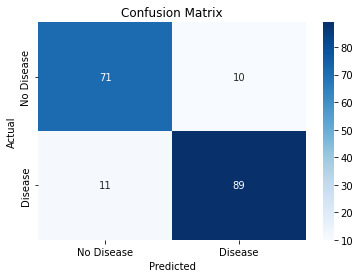

In [21]:
test_predictions, A2 = make_predictions(X_test, W1, b1, W2, b2)
get_metrics(test_predictions.flatten(), A2.flatten(), y_test.flatten())
confusion(test_predictions, y_test, "Blues")

Accuracy  : 0.8728
Precision : 0.8696
Recall    : 0.9045
F1-Score  : 0.8867
ROC AUC   : 0.9336
Log Loss  : 0.3257


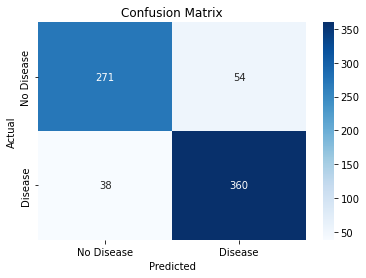

In [22]:
# Measure on the training set to see if the model is overfitting
train_predictions, A2 = make_predictions(X_train, W1, b1, W2, b2)
get_metrics(train_predictions.flatten(), A2.flatten(), y_train.flatten())
confusion(train_predictions, y_train, "Blues")

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin

# Wrapper class for the neural network to use with scikit-learn
class NeuralNetWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.003, epochs=25000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        X = X.T
        y = y.reshape(1, -1)
        self.W1, self.b1, self.W2, self.b2 = gradient_descent(self.lr, self.epochs)
        return self

    def predict_proba(self, X):
        X = X.T
        _, A2 = make_predictions(X, self.W1, self.b1, self.W2, self.b2)
        A2 = A2.T
        A2 = np.clip(A2, 1e-15, 1 - 1e-15)
        return np.hstack([1 - A2, A2])

    def predict(self, X):
        return get_predictions(self.predict_proba(X)[:, 1])

## Permutation Feature Importance

In [24]:
from sklearn.inspection import permutation_importance

# Function to calculate and plot feature importance using permutation importance
def feature_importance(model):
    result = permutation_importance(model, X_test.T, y_test.flatten(), scoring='neg_log_loss', random_state=8)

    importances = result.importances_mean
    std = result.importances_std
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10,6))
    plt.bar(range(len(importances)), importances[indices], yerr=std[indices])
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.title("Permutation Feature Importance")
    plt.ylim(0, 0.12)
    plt.tight_layout()
    plt.show()    

In [25]:
ann_model = NeuralNetWrapper(epochs=50000)
ann_model.fit(X_train, y_train.flatten()) 

NeuralNetWrapper(epochs=50000)

In [26]:
# def predict_prob(X): 
#     X = X.T
#     _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
#     return A2.T  

In [27]:
# import shap

# # Use a small representative background set for speed
# background = X_train.T[np.random.choice(X_train.shape[1], 100, replace=False)]

# explainer = shap.KernelExplainer(predict_prob, background, seed=8)

# # Explain predictions for a few test samples
# shap_values = explainer.shap_values(X_test.T[:50])  # Shape: (1, n_samples, n_features)

# shap.summary_plot(shap_values[0], X_test.T[:50], feature_names=feature_names)

<!-- Y-axis:

    Feature names, sorted top to bottom by importance (mean absolute SHAP value).

    Features at the top (e.g., ST_Slope_Up, ST_Slope_Flat, ChestPainType_ASY) have the strongest influence on predictions.

X-axis:

    SHAP value = how much that feature pushes the prediction toward heart disease (right) or no disease (left) for a given sample.

    A value of +0.10 means that feature contributes strongly toward predicting heart disease for that sample.

    A value of -0.10 means it contributes toward predicting no disease.

Color:

    Red = high feature value

    Blue = low feature value -->

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model with specified parameters
rf_model = RandomForestClassifier(n_estimators=5000, max_depth=5, random_state=5, oob_score=True, bootstrap=True, criterion='log_loss',)
rf_model.fit(X_train.T, y_train.flatten())

RandomForestClassifier(criterion='log_loss', max_depth=5, n_estimators=5000,
                       oob_score=True, random_state=5)

In [29]:
y_pred_rf = rf_model.predict(X_test.T)
y_prob_rf = rf_model.predict_proba(X_test.T)
y_prob_class1 = y_prob_rf[:, 1]

Accuracy  : 0.8729
Precision : 0.8812
Recall    : 0.8900
F1-Score  : 0.8856
ROC AUC   : 0.9510
Log Loss  : 0.3024


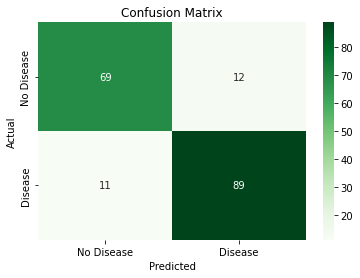

In [30]:
get_metrics(y_pred_rf.flatten(), y_prob_class1, y_test.flatten())
confusion(y_pred_rf, y_test, "Greens")

In [31]:
# Measure on the training set to see if the model is overfitting
y_pred_train = rf_model.predict(X_train.T)
y_prob_train = rf_model.predict_proba(X_train.T)[:, 1]

get_metrics(y_pred_train, y_prob_train, y_train.flatten())


Accuracy  : 0.8963
Precision : 0.8892
Recall    : 0.9271
F1-Score  : 0.9077
ROC AUC   : 0.9622
Log Loss  : 0.2751


## XGBoost

In [32]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 450, 500, 550, 600, 700, 800],
    'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.07, 0.1, 0.15],
    'max_depth': [3, 5, 6, 7 , 8,9],
    'min_child_weight': [1, 2, 2.5, 3, 3.5, 4,5],
    'subsample':[1.00, 1.2, 1.4], #lower is less complex
    'colsample_bytree': [0.9, 1.2, 1.5], #lower is less complex
    'reg_alpha': [6, 8, 10, 100], # larger values is less overfitting
    'reg_lambda': [0.5, 0.7, 1, 1.2, 1.3] # larger values is less overfitting
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=8)

# Perform Randomized Search with 5 fold Cross-Validation
grid_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='neg_log_loss', n_iter=200, n_jobs=-1, verbose=2, random_state=8)
grid_search.fit(X_train.T, y_train.flatten())

# Get the best model from the grid search
xgb_model = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters:  {'subsample': 1.0, 'reg_lambda': 1.3, 'reg_alpha': 6, 'n_estimators': 450, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Best Score:  -0.3584951025974791


c:\Users\31617\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
885 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\31617\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\31617\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "C:\Users\31617\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py", line 1599, in fit
    self._Booster = train(
  File "C:\Users\31617\AppData\Roamin

In [33]:
# import sklearn
# sklearn.metrics.get_scorer_names()

Accuracy  : 0.8950
Precision : 0.9010
Recall    : 0.9100
F1-Score  : 0.9055
ROC AUC   : 0.9488
Log Loss  : 0.2980


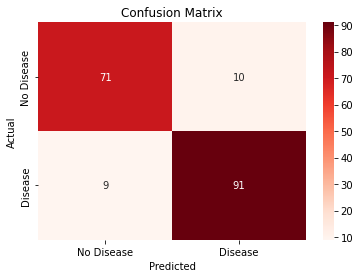

Accuracy  : 0.9059
Precision : 0.9044
Recall    : 0.9271
F1-Score  : 0.9156
ROC AUC   : 0.9547
Log Loss  : 0.2811


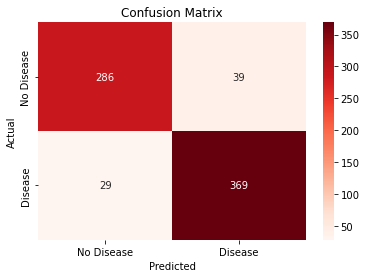

In [34]:
y_pred_xgb2 = xgb_model.predict(X_test.T)
y_prob_xgb2 = xgb_model.predict_proba(X_test.T)
y_prob_xgb2 = y_prob_xgb2[:,1]

get_metrics(y_pred_xgb2, y_prob_xgb2, y_test.flatten())
confusion(y_pred_xgb2, y_test, "Reds")

# Measure on the training set to see if the model is overfitting
y_pred_xgb = xgb_model.predict(X_train.T)
y_prob_xgb = xgb_model.predict_proba(X_train.T)
y_prob_xgb = y_prob_xgb[:,1]

get_metrics(y_pred_xgb, y_prob_xgb, y_train.flatten())
confusion(y_pred_xgb, y_train, "Reds")

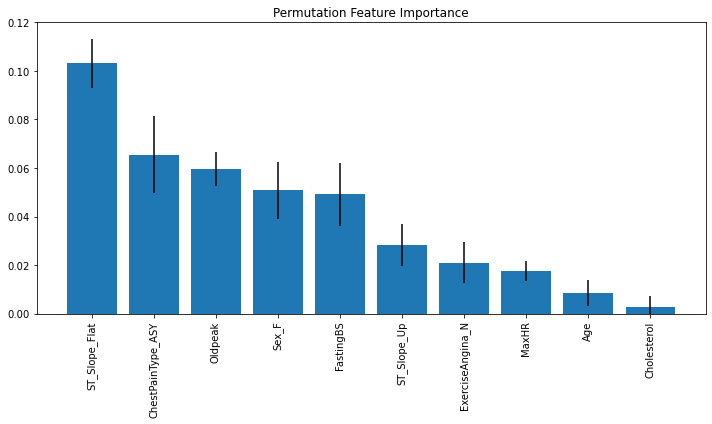

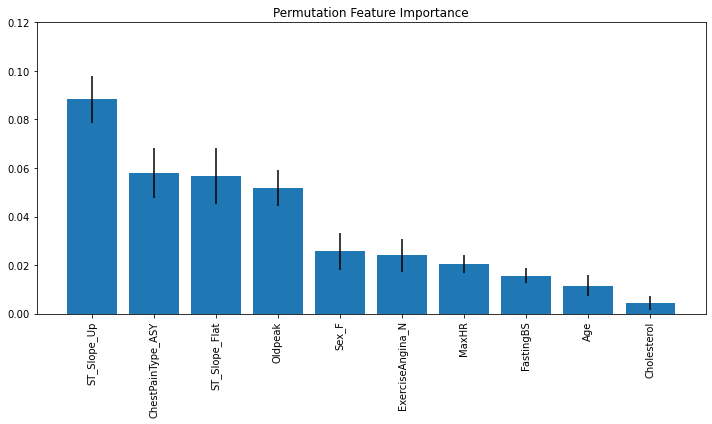

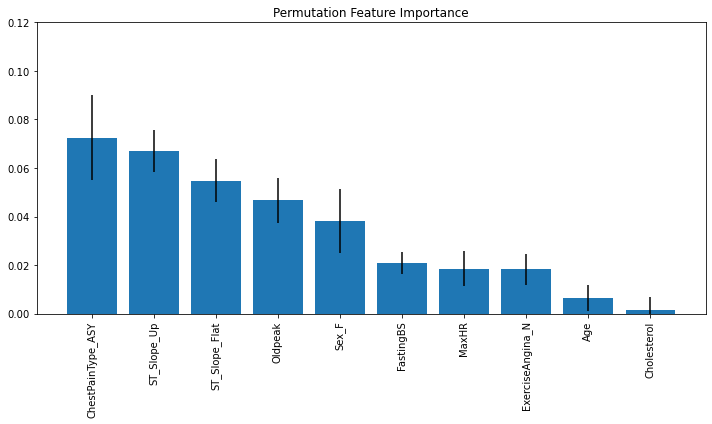

In [35]:
feature_importance(ann_model)
feature_importance(rf_model)
feature_importance(xgb_model)

## Comparing the models


In [166]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# Wrapping ANN model with scaling
ann_model_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', ann_model) 
])

rf_model_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', rf_model)
])

xgb_model_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', xgb_model)
])

In [167]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

models = {
    "ANN": ann_model_scaled,
    "RF": rf_model_scaled,
    "XGB": xgb_model_scaled
}

# Define scorer
recall_scorer = make_scorer(recall_score)
f1_scorer = make_scorer(f1_score)
loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
acc_scorer = make_scorer(accuracy_score)
prec_scorer = make_scorer(precision_score)

# Number of CV folds
# use stratified k-fold to ensure each fold has the same proportion of classes
cv_folds = StratifiedKFold(n_splits=15, shuffle=True, random_state=8)

# Store scores
model_recall_scores = {}
model_f1_scores = {}
model_loss_scores = {}
model_auc_scores = {}
model_acc_scores = {}
model_prec_scores = {}

# Evaluate each model using cross-validation on different metrics and print the mean and standard deviation of the scores
# The scores are stored in dictionaries for further analysis or plotting if needed
for scorer_name, scorer, scores_dic in zip(
    ["Recall", "F1", "Log Loss", "AUC", "Accuracy", "Precision"],
    [recall_scorer, f1_scorer, loss_scorer, auc_scorer, acc_scorer, prec_scorer],
    [model_recall_scores, model_f1_scores, model_loss_scores, model_auc_scores, model_acc_scores, model_prec_scores]):
    print(f"\n=== {scorer_name} ===")
    
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=cv_folds, scoring=scorer, n_jobs=-1)
        scores_dic[name] = scores
        print(f"{name:<3} Mean: {scores.mean():>7.4f} ± {scores.std():.4f}")


=== Recall ===
ANN Mean:  0.9055 ± 0.0654
RF  Mean:  0.9036 ± 0.0495
XGB Mean:  0.8996 ± 0.0548

=== F1 ===
ANN Mean:  0.8906 ± 0.0373
RF  Mean:  0.8762 ± 0.0289
XGB Mean:  0.8825 ± 0.0340

=== Log Loss ===
ANN Mean: -0.3091 ± 0.0722
RF  Mean: -0.3406 ± 0.0619
XGB Mean: -0.3354 ± 0.0733

=== AUC ===
ANN Mean:  0.9395 ± 0.0386
RF  Mean:  0.9301 ± 0.0371
XGB Mean:  0.9281 ± 0.0366

=== Accuracy ===
ANN Mean:  0.8838 ± 0.0393
RF  Mean:  0.8595 ± 0.0321
XGB Mean:  0.8683 ± 0.0378

=== Precision ===
ANN Mean:  0.8719 ± 0.0442
RF  Mean:  0.8534 ± 0.0450
XGB Mean:  0.8693 ± 0.0462


In [170]:
from scipy.stats import wilcoxon
import warnings
warnings.filterwarnings("ignore") # Ignore warnings for cleaner output

# Define models and metrics
models_to_compare = ["ANN", "RF", "XGB"]
metric_scores = {
    "Recall": model_recall_scores,
    "F1": model_f1_scores,
    "Log Loss": model_loss_scores,
    "ROC AUC": model_auc_scores,
    "Accuracy": model_acc_scores,
    "Precision": model_prec_scores
}

# Collect comparisons
comparisons = []
for metric_name, score_dict in metric_scores.items():
    ann_scores = score_dict["ANN"]
    for other_model in ["RF", "XGB"]:
        comparisons.append(
            (f"ANN vs {other_model}", ann_scores, score_dict[other_model], metric_name)
        )

# Run wilcoxon test for each comparison and print results
print(f"{'Comparison':<15} {'Metric':<10} {'W-value':>11} {'p-value':>12} {'Result':>11}")
print("-" * 80)
for comp, scores1, scores2, metric in comparisons:
    t, p = wilcoxon(scores1, scores2)
    result = "      ✅ Significant (p < 0.05)" if p < 0.05 else "❌ Not significant"
    print(f"{comp:<15} {metric:<10} {t:>11.4f} {p:>11.4f} {result:>23}")

Comparison      Metric         W-value      p-value      Result
--------------------------------------------------------------------------------
ANN vs RF       Recall         19.5000      0.7206       ❌ Not significant
ANN vs XGB      Recall         37.5000      0.5712       ❌ Not significant
ANN vs RF       F1             18.0000      0.0994       ❌ Not significant
ANN vs XGB      F1             20.0000      0.1361       ❌ Not significant
ANN vs RF       Log Loss       13.0000      0.0054       ✅ Significant (p < 0.05)
ANN vs XGB      Log Loss       12.0000      0.0043       ✅ Significant (p < 0.05)
ANN vs RF       ROC AUC        11.5000      0.0043       ✅ Significant (p < 0.05)
ANN vs XGB      ROC AUC         7.0000      0.0012       ✅ Significant (p < 0.05)
ANN vs RF       Accuracy        8.5000      0.0165       ✅ Significant (p < 0.05)
ANN vs XGB      Accuracy        5.0000      0.0371       ✅ Significant (p < 0.05)
ANN vs RF       Precision      22.0000      0.1005       ❌ Not 